Found 3158 images belonging to 6 classes.
Found 785 images belonging to 6 classes.
Epoch 1/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.7862 - loss: 0.7850 - val_accuracy: 0.8177 - val_loss: 0.5324
Epoch 2/15
 1/98 ━━━━━━━━━━━━━━━━━━━━ 1:41 1s/step - accuracy: 0.8438 - loss: 0.4448

C:\Program Files\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8438 - loss: 0.4448 - val_accuracy: 0.7059 - val_loss: 0.9284
Epoch 3/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 258s 2s/step - accuracy: 0.8272 - loss: 0.4530 - val_accuracy: 0.8490 - val_loss: 0.4426
Epoch 4/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8125 - loss: 0.5139 - val_accuracy: 0.7647 - val_loss: 0.4409
Epoch 5/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.8343 - loss: 0.4334 - val_accuracy: 0.8516 - val_loss: 0.4174
Epoch 6/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8750 - loss: 0.2867 - val_accuracy: 0.8824 - val_loss: 0.2416
Epoch 7/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.8596 - loss: 0.3701 - val_accuracy: 0.8594 - val_loss: 0.4076
Epoch 8/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6562 - loss: 0.6110 - val_accuracy: 0.7647 - val_loss: 0.4916
Epoch 9/15
98/98 ━━━━━━━━━━━━━━━━━━━━ 242s 2s/step - accuracy: 0.8621 - loss: 0.3540 - val_accuracy: 0.8581 - val_loss: 0.392

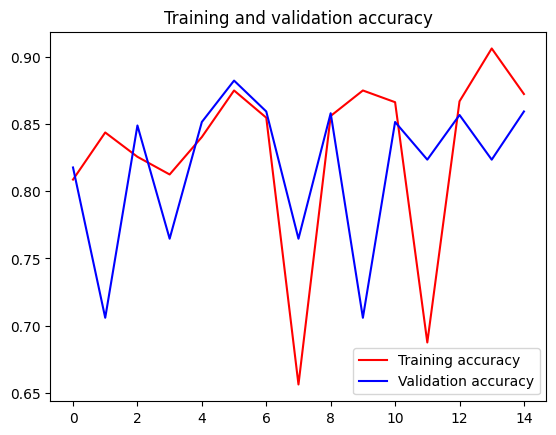

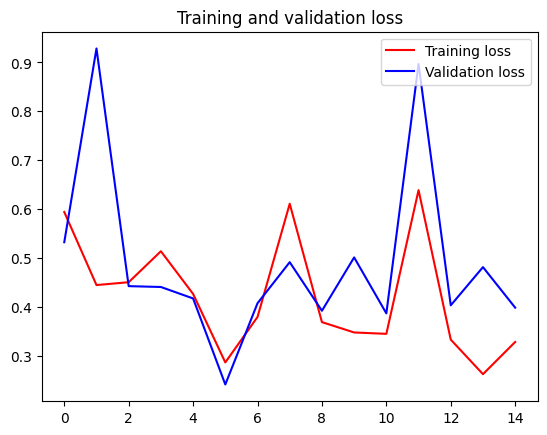

In [5]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Define directory using raw string literal
data_dir = 'vehicle'

# Create ImageDataGenerator
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% for validation
)

# Training generator
train_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Validation generator
validation_generator = datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Define the model
model = Sequential([
    tf.keras.layers.Input(shape=(150, 150, 3)),  # Input layer
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(6, activation='softmax')  # 6 classes for 6 vehicle types
])

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=15
)

# Plot training & validation accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc='upper right')
plt.show()

# Save the trained model



In [6]:
model.save('vehicle.h5')